# 8.2. PCA

На лекции вы узнали об одном из самых сильных и часто используемых методов понижения размерности - [методе главных компонент](https://colab.research.google.com/drive/1ldt1uUd8bJwiuUHrp2xmTKjELYVLcdzZ#scrollTo=mAiVLZc6zFCd) (Principal Components Analysis, PCA).

В этом задании вам предстоит воспользоваться реализацией этого метода из стандартных библиотек. Мы предлагаем вам использовать класс [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Ваша задача найти оптимальное количество компонент, которое нужно для максимизации качества решения задачи многоклассовой классификации на основе датасета `MNIST` при помощи **логистической регрессии**.

Для решения задачи мы возьмём только 2000 первых картинок. Это количество оптимально с точки зрения времени решения задачи и возможностей алгоритма. Просим Вас не изменять это значение, поскольку это может привести к изменению ответа.

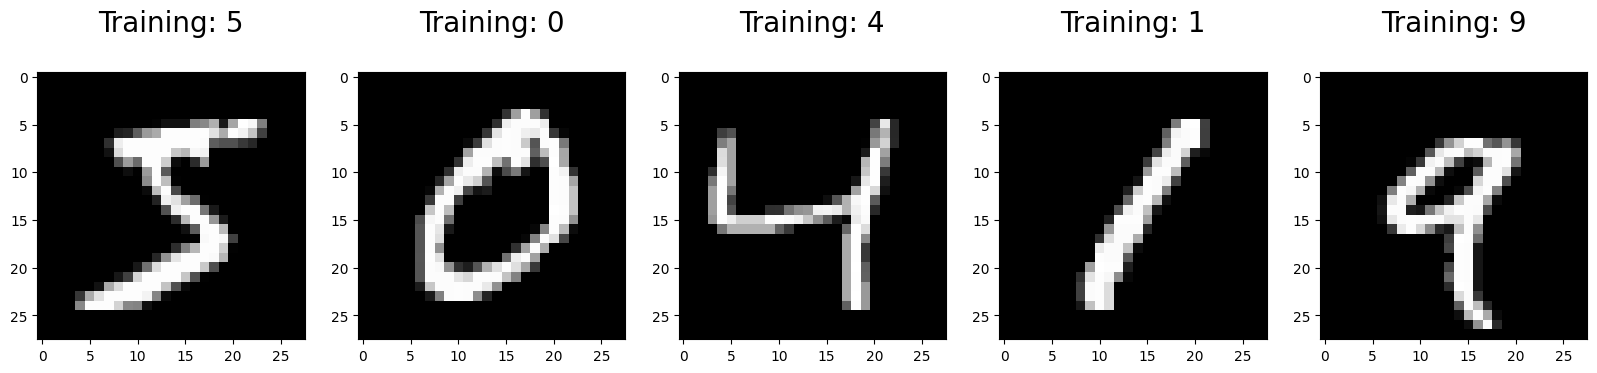

In [ ]:
# JUST RUN THIS CELL
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X = X[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

Ваша задача - определить какая размерность PCA из `[1,3,5,10,15,20,30,40,50,60]` оптимальна для решения задачи классификации. Обязательно установите параметр max_iter=500 при создании объекта класса `sklearn.linear_model.LogisticRegression`.

В тестовую выборку отправьте 30% объектов. В качестве random_state используйте число 42 везде, где это необходимо.

In [ ]:
N_COMPONENTS = [1,3,5,10,15,20,30,40,50,60]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

components_list = [1, 3, 5, 10, 15, 20, 30, 40, 50, 60]
best_accuracy = 0
best_n = None

for n in components_list:
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    clf = LogisticRegression(max_iter=500, random_state=42)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    print(f"n_components = {n} --> Accuracy: {acc:.4f}")



n_components = 1 --> Accuracy: 0.2967
n_components = 3 --> Accuracy: 0.4867
n_components = 5 --> Accuracy: 0.6717
n_components = 10 --> Accuracy: 0.7817
n_components = 15 --> Accuracy: 0.8550
n_components = 20 --> Accuracy: 0.8567
n_components = 30 --> Accuracy: 0.8517
n_components = 40 --> Accuracy: 0.8500
n_components = 50 --> Accuracy: 0.8367
n_components = 60 --> Accuracy: 0.8417
